<a href="https://colab.research.google.com/github/k-washi/GoogleColab_ML/blob/master/DeepNN_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [19]:
%cd "drive/My Drive/datasets/pytorch_test"

[Errno 2] No such file or directory: 'drive/My Drive/datasets/pytorch_test'
/content/drive/My Drive/datasets/pytorch_test


In [20]:
import torch
from torch.nn import Linear
#y = wx + b
linear_layer = Linear(in_features=5,out_features=3,bias=True)

from torch.autograd import Variable
inp = Variable(torch.randn(1, 5))
linear_layer(inp)
print(linear_layer.weight) #５つの入力に対する重み
print(linear_layer.bias) #バイアス

Parameter containing:
tensor([[ 0.0273,  0.3025,  0.2016, -0.4304,  0.0672],
        [ 0.1347,  0.4115,  0.2896,  0.0627, -0.1626],
        [ 0.0955, -0.2670, -0.0267, -0.0582, -0.2922]], requires_grad=True)
Parameter containing:
tensor([-0.3000, -0.1814,  0.0809], requires_grad=True)


In [21]:
linear_layer = Linear(5, 3)
linear_layer_2 = Linear(3, 2)
linear_layer_2(linear_layer(inp))

tensor([[-1.3646, -0.9339]], grad_fn=<AddmmBackward>)

計算コストの面では、Sigmoidやtanhが不利
ReLUは、慎重に学習率を選択しなければ、dead neutronsという非活性状態になる。

In [22]:
import torch.nn as nn
ex_data = Variable(torch.Tensor([[10, 2, -1, -1]]))
ex_relu = nn.ReLU()
ex_relu(ex_data)

tensor([[10.,  2.,  0.,  0.]])

In [0]:
class MyFirstNetwork(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(MyFirstNetwork,self).__init__() 
        self.layer1 = nn.Linear(input_size,hidden_size) 
        self.layer2 = nn.Linear(hidden_size,output_size)
    def __forward__(self,input): 
        out = self.layer1(input) 
        out = nn.ReLU(out)
        out = self.layer2(out) 
        return out

In [0]:
my_network = MyFirstNetwork(input_size = 3, hidden_size = 2, output_size = 1)

In [25]:
#Loss
loss = nn.MSELoss()
input = Variable(torch.randn(3, 5), requires_grad=True) 
target = Variable(torch.randn(3, 5))
output = loss(input, target)
output.backward()
print(output)

tensor(1.3527, grad_fn=<MseLossBackward>)


In [0]:
def cross_entropy_function(true_label, prediction):
    if true_label == 1:
        return -log(prediction)
    else:
        return -log(1 - prediction)

In [27]:
loss = nn.CrossEntropyLoss()
input = Variable(torch.randn(2, 6), requires_grad=True)
target = Variable(torch.LongTensor(2).random_(6))
print(torch.LongTensor(2).random_(6))
print(target)
output = loss(input, target)
output.backward()
print(output)


tensor([0, 1])
tensor([1, 5])
tensor(3.7430, grad_fn=<NllLossBackward>)


In [28]:
optimizer = torch.optim.SGD(my_network.parameters(), lr = 0.01)
"""
print(torch.utils.data.Dataset)
for input, target in torch.utils.data.Dataset:
    optimizer.zero_grad()
    output = model(input)
    loss = loss_fn(output, target)
    loss.backward()
    optimizer.step()
"""

'\nprint(torch.utils.data.Dataset)\nfor input, target in torch.utils.data.Dataset:\n    optimizer.zero_grad()\n    output = model(input)\n    loss = loss_fn(output, target)\n    loss.backward()\n    optimizer.step()\n'

In [0]:
import glob
import os
import numpy as np
import matplotlib.pyplot as plt
import shutil
from torchvision import transforms
from torchvision import models
from torch.optim import lr_scheduler
from torch import optim
from torchvision.datasets import ImageFolder
from torchvision.utils import make_grid
import torch.nn.functional as F
import warnings
warnings.filterwarnings("ignore")
import time
%matplotlib inline

In [30]:
!ls
path = 'Dog-Cat-Classifier/Data/Train_Data/'
dog_files = [f for f in glob.glob('Dog-Cat-Classifier/Data/Train_Data/dog/*.jpg')]
cat_files = [f for f in glob.glob('Dog-Cat-Classifier/Data/Train_Data/cat/*.jpg')]
files = dog_files + cat_files
print(f'Total no of images {len(files)}')
no_of_images = len(files)

shuffle = np.random.permutation(no_of_images)

admit_status.csv  Dog-Cat-Classifier
Total no of images 0


In [31]:
os.mkdir(os.path.join(path, 'train'))
os.mkdir(os.path.join(path, 'valid'))

FileExistsError: ignored

In [0]:
for t in ['train', 'valid']:
  for folder in ['dog/', 'cat/']:
    os.mkdir(os.path.join(path, t, folder))

In [0]:
print(shuffle[0])
for i in shuffle[250:]:
    folder = files[i].split('/')[-2].split('.')[0]
    image = files[i].split('/')[-1]
    os.rename(files[i],os.path.join(path,'train',folder,image))
print(folder)
print(image)

In [0]:
print(shuffle[0])
for i in shuffle[:250]:
    folder = files[i].split('/')[-2].split('.')[0]
    image = files[i].split('/')[-1]
    os.rename(files[i],os.path.join(path,'valid',folder,image))
print(folder)
print(image)

ImageFolder は、pytorchが提供する、データ読み込み用のAPI
+ Scale to any image size
+ convert to a pytorch tensor
+ normalize the data

In [32]:
if torch.cuda.is_available():
    is_cuda = True
    print("torch is cuda available")

torch is cuda available


In [33]:
simple_transform = transforms.Compose([transforms.Resize((224,224))
                                       ,transforms.ToTensor()
                                       ,transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])])
train = ImageFolder('Dog-Cat-Classifier/Data/Train_Data/train/',simple_transform)
valid = ImageFolder('Dog-Cat-Classifier/Data/Train_Data/valid/',simple_transform)
print(train)
print(valid)
print(train.class_to_idx)
print(train.classes) 

Dataset ImageFolder
    Number of datapoints: 1149
    Root location: Dog-Cat-Classifier/Data/Train_Data/train/
    StandardTransform
Transform: Compose(
               Resize(size=(224, 224), interpolation=PIL.Image.BILINEAR)
               ToTensor()
               Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
           )
Dataset ImageFolder
    Number of datapoints: 250
    Root location: Dog-Cat-Classifier/Data/Train_Data/valid/
    StandardTransform
Transform: Compose(
               Resize(size=(224, 224), interpolation=PIL.Image.BILINEAR)
               ToTensor()
               Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
           )
{'cat': 0, 'dog': 1}
['cat', 'dog']


In [0]:
def imshow(inp):
    """Imshow for Tensor."""
    inp = inp.numpy().transpose((1, 2, 0))
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    inp = std * inp + mean
    inp = np.clip(inp, 0, 1)
    plt.imshow(inp)   

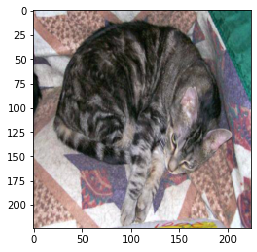

In [35]:
imshow(train[30][0])

Create train data
+ shuffle: When true, this shuffles the images every time the data loader is called.
+ num_workers: This is responsible for parallelization. It is common practice to use a number of workers fewer than the number of cores available in your machine.


In [0]:
train_data_gen = torch.utils.data.DataLoader(train,shuffle=True,batch_size=64,num_workers=3)
valid_data_gen = torch.utils.data.DataLoader(valid,batch_size=64,num_workers=3)
dataloaders = {'train':train_data_gen,'valid':valid_data_gen}
dataset_sizes = {'train':float(len(train_data_gen.dataset)),'valid':float(len(valid_data_gen.dataset))}

In [37]:
model_ft = models.resnet18(pretrained=True)
num_ftrs = model_ft.fc.in_features
model_ft.fc = nn.Linear(num_ftrs, 2)

if torch.cuda.is_available():
    model_ft = model_ft.cuda()

Downloading: "https://download.pytorch.org/models/resnet18-5c106cde.pth" to /root/.cache/torch/checkpoints/resnet18-5c106cde.pth


In [38]:
model_ft

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

StepLRは、学習率を動的に変更する。

In [0]:
learning_rate = 0.001
criterion = nn.CrossEntropyLoss()
optimizer_ft = optim.SGD(model_ft.parameters(), lr=0.001, momentum=0.9)
exp_lr_scheduler = lr_scheduler.StepLR(optimizer_ft, step_size=7, gamma=0.1)


In [0]:
def train_model(model, criterion, optimizer, scheduler, num_epochs=20):
    since = time.time()

    best_model_wts = model.state_dict()
    best_acc = 0.0

    for epoch in range(num_epochs):
        print('Epoch {}/{}'.format(epoch, num_epochs - 1))
        print('-' * 10)

        # Each epoch has a training and validation phase
        for phase in ['train', 'valid']:
            if phase == 'train':
                scheduler.step()
                model.train(True)  # Set model to training mode
            else:
                model.train(False)  # Set model to evaluate mode

            running_loss = 0.0
            running_corrects = 0

            # Iterate over data.
            for data in dataloaders[phase]:
                # get the inputs
                inputs, labels = data

                # wrap them in Variable
                if torch.cuda.is_available():
                    inputs = Variable(inputs.cuda())
                    labels = Variable(labels.cuda())
                else:
                    inputs, labels = Variable(inputs), Variable(labels)

                # zero the parameter gradients
                #https://stackoverflow.com/questions/48001598/why-do-we-need-to-call-zero-grad-in-pytorch
                optimizer.zero_grad()
                
                # forward
                outputs = model(inputs)
                _, preds = torch.max(outputs.data, 1)
                loss = criterion(outputs, labels)

                # backward + optimize only if in training phase
                if phase == 'train':
                    loss.backward()
                    optimizer.step()

                # statistics
                running_loss += loss.data#[0]
                
                running_corrects += torch.sum(preds == labels.data)

            epoch_loss = running_loss / dataset_sizes[phase]
            epoch_acc = running_corrects / dataset_sizes[phase]

            print('{} Loss: {:.4f} Acc: {:.4f}'.format(
                phase, epoch_loss, epoch_acc))

            # deep copy the model
            if phase == 'valid' and epoch_acc > best_acc:
                best_acc = epoch_acc
                best_model_wts = model.state_dict()

        print()

    time_elapsed = time.time() - since
    print('Training complete in {:.0f}m {:.0f}s'.format(
        time_elapsed // 60, time_elapsed % 60))
    print('Best val Acc: {:4f}'.format(best_acc))

    # load best model weights
    model.load_state_dict(best_model_wts)
    return model

In [41]:
model_ft = train_model(model_ft, criterion, optimizer_ft, exp_lr_scheduler, num_epochs=2)

Epoch 0/1
----------
train Loss: 0.0075 Acc: 0.7615
valid Loss: 0.0026 Acc: 0.9680

Epoch 1/1
----------
train Loss: 0.0019 Acc: 0.9687
valid Loss: 0.0011 Acc: 0.9840

Training complete in 0m 15s
Best val Acc: 0.984000


# VGG MODEL

In [0]:
vgg = models.vgg16(pretrained=True)
vgg = vgg.cuda()

In [43]:
vgg

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

In [0]:

#Feature部分は学習させない
for param in vgg.features.parameters(): 
  param.requires_grad = False #微分の対象にしない
#vgg.classifier[6].out_features = 2
vgg.classifier[6] = Linear(4096, 2).cuda()

In [81]:
vgg

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

In [0]:
optimizer = optim.SGD(vgg.classifier.parameters(),lr=0.0001,momentum=0.5)

In [0]:
def fit(epoch,model,data_loader,phase='training',volatile=False):
    if phase == 'training':
        model.train()
    if phase == 'validation':
        model.eval()
        volatile=True
    running_loss = 0.0
    running_correct = 0
    for batch_idx , (data,target) in enumerate(data_loader):
        if is_cuda:
            data,target = data.cuda(),target.cuda()
        data , target = Variable(data,volatile),Variable(target)
        if phase == 'training':
            optimizer.zero_grad()
        output = model(data)
        loss = F.cross_entropy(output,target)
        
        running_loss += F.cross_entropy(output,target,size_average=False).data
        preds = output.data.max(dim=1,keepdim=True)[1]
        running_correct += preds.eq(target.data.view_as(preds)).cpu().sum()
        if phase == 'training':
            loss.backward()
            optimizer.step()
    
    loss = running_loss/float(len(data_loader.dataset))
    accuracy = 100. * running_correct/float(len(data_loader.dataset))
    
    print(f'{phase} loss is {loss:{5}.{2}} and {phase} accuracy is {running_correct}/{len(data_loader.dataset)}{accuracy:{10}.{4}}')
    return loss,accuracy

In [88]:
train_losses , train_accuracy = [],[]
val_losses , val_accuracy = [],[]
for epoch in range(1,20):
    epoch_loss, epoch_accuracy = fit(epoch,vgg,train_data_gen,phase='training')
    val_epoch_loss , val_epoch_accuracy = fit(epoch,vgg,valid_data_gen,phase='validation')
    train_losses.append(epoch_loss)
    train_accuracy.append(epoch_accuracy)
    val_losses.append(val_epoch_loss)
    val_accuracy.append(val_epoch_accuracy)

training loss is  0.53 and training accuracy is 870/1149     75.72
validation loss is  0.47 and validation accuracy is 220/250      88.0
training loss is  0.44 and training accuracy is 968/1149     84.25
validation loss is   0.4 and validation accuracy is 230/250      92.0
training loss is  0.38 and training accuracy is 1020/1149     88.77
validation loss is  0.35 and validation accuracy is 233/250      93.2
training loss is  0.34 and training accuracy is 1045/1149     90.95
validation loss is  0.31 and validation accuracy is 236/250      94.4
training loss is   0.3 and training accuracy is 1063/1149     92.52
validation loss is  0.28 and validation accuracy is 242/250      96.8
training loss is  0.28 and training accuracy is 1073/1149     93.39
validation loss is  0.26 and validation accuracy is 244/250      97.6
training loss is  0.25 and training accuracy is 1085/1149     94.43
validation loss is  0.24 and validation accuracy is 244/250      97.6
training loss is  0.23 and training 

# CNN MODEL Understanding

In [0]:
train_data_loader = torch.utils.data.DataLoader(train,batch_size=32,num_workers=3,shuffle=False)
img,label = next(iter(train_data_loader))

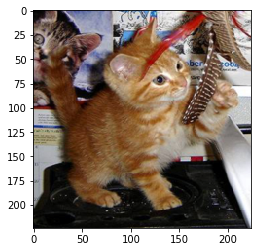

In [91]:
imshow(img[10])

In [0]:
img = img[10][None]


In [0]:
vgg = models.vgg16(pretrained=True).cuda()

In [0]:
class LayerActivations():
    features=None
    
    def __init__(self,model,layer_num):
        self.hook = model[layer_num].register_forward_hook(self.hook_fn) #forward (予測時に関数が実行される)　ときにレイヤーの出力をfeatures変数に保存
    
    def hook_fn(self,module,input,output):
      #register_forward_hockより, module:レイヤーへのアクセス, input:レイヤを流れるデータを参照, output:パラメータ(アクティベーション)
        self.features = output.cpu().data.numpy()
    
    def remove(self):
      #関数からフックを取得し、関数の登録を解除
      #これを実行することで、アクティベーションのモデルとレイヤ番号を渡すことが可能になる
        self.hook.remove()
        

conv_out = LayerActivations(vgg.features,0)

o = vgg(Variable(img.cuda()))

conv_out.remove()

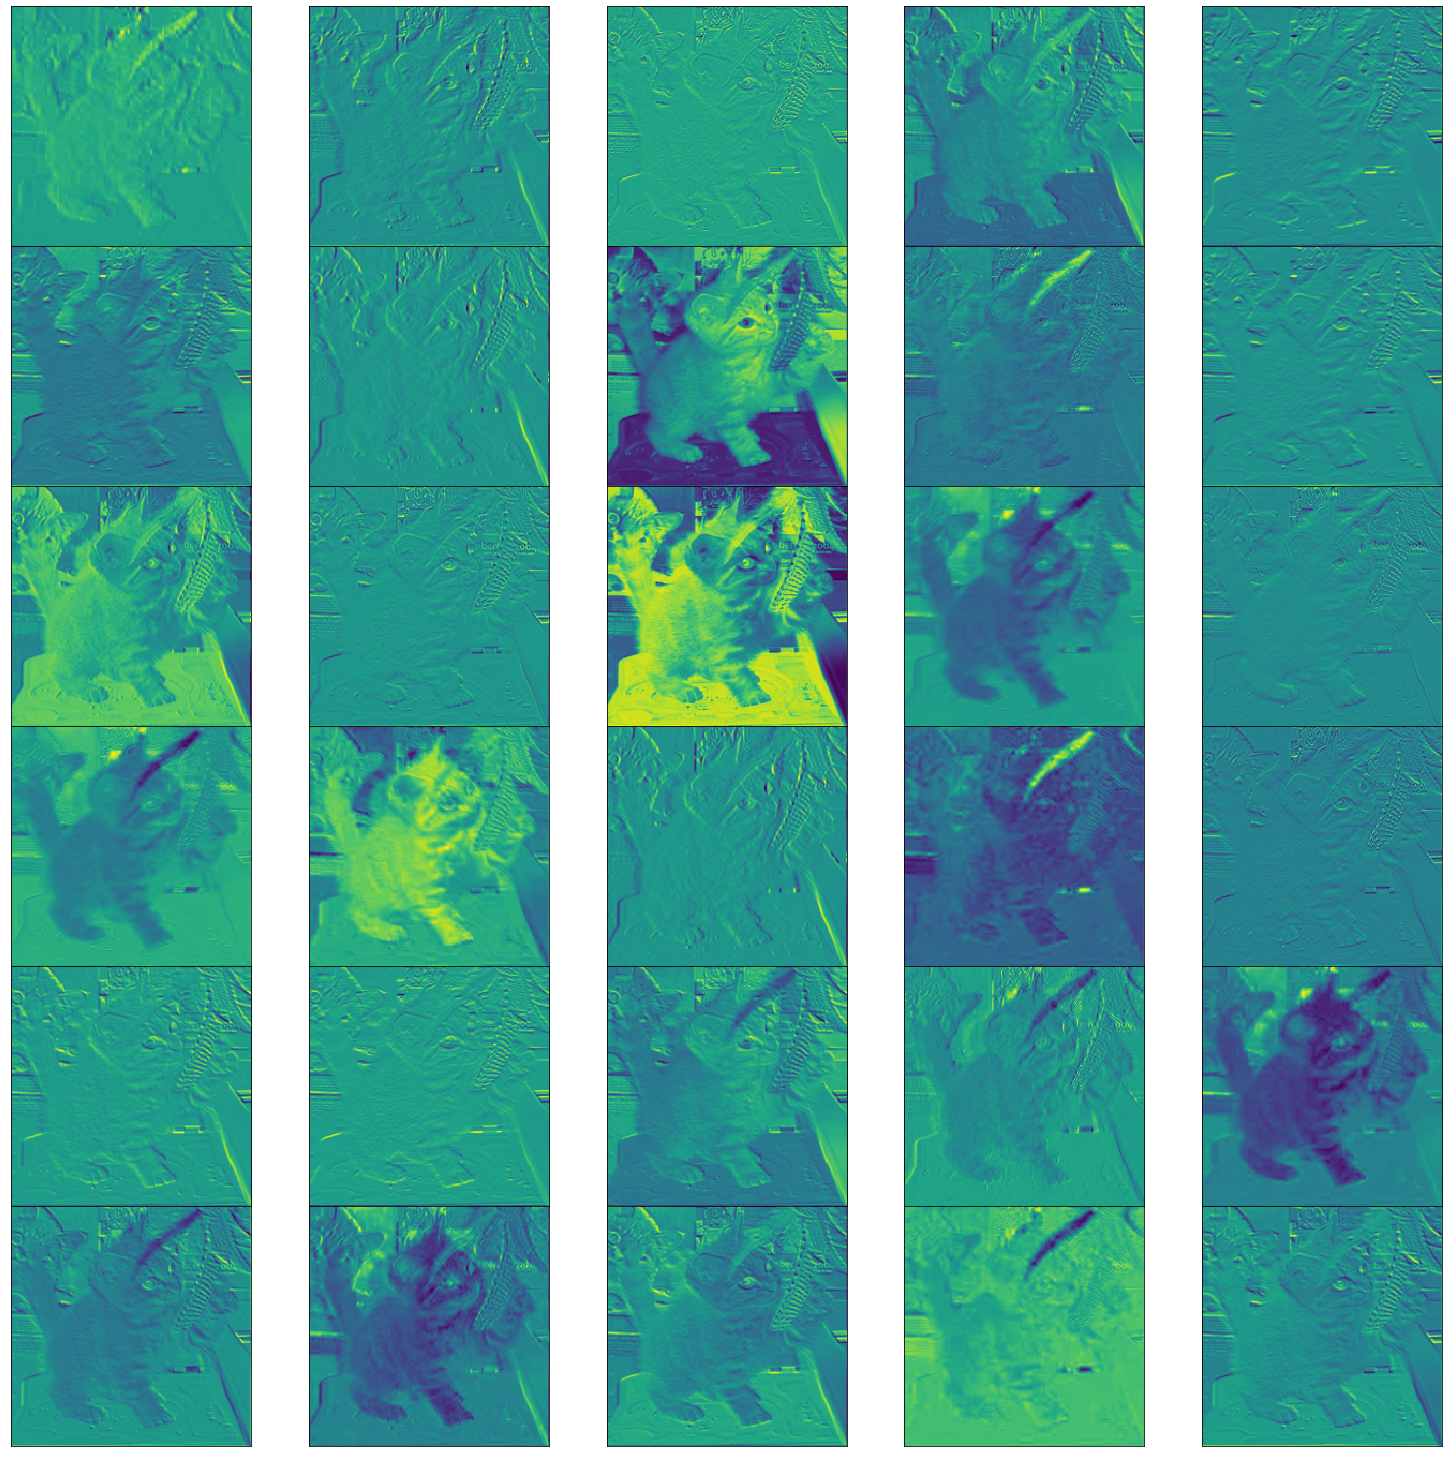

In [95]:
act = conv_out.features

fig = plt.figure(figsize=(20,50))
fig.subplots_adjust(left=0,right=1,bottom=0,top=0.8,hspace=0,wspace=0.2)
for i in range(30):
    ax = fig.add_subplot(12,5,i+1,xticks=[],yticks=[])
    ax.imshow(act[0][i])

Feature map (ReLUのあとの層)を可視化

In [98]:
act.shape

(1, 64, 224, 224)

(1, 512, 28, 28)


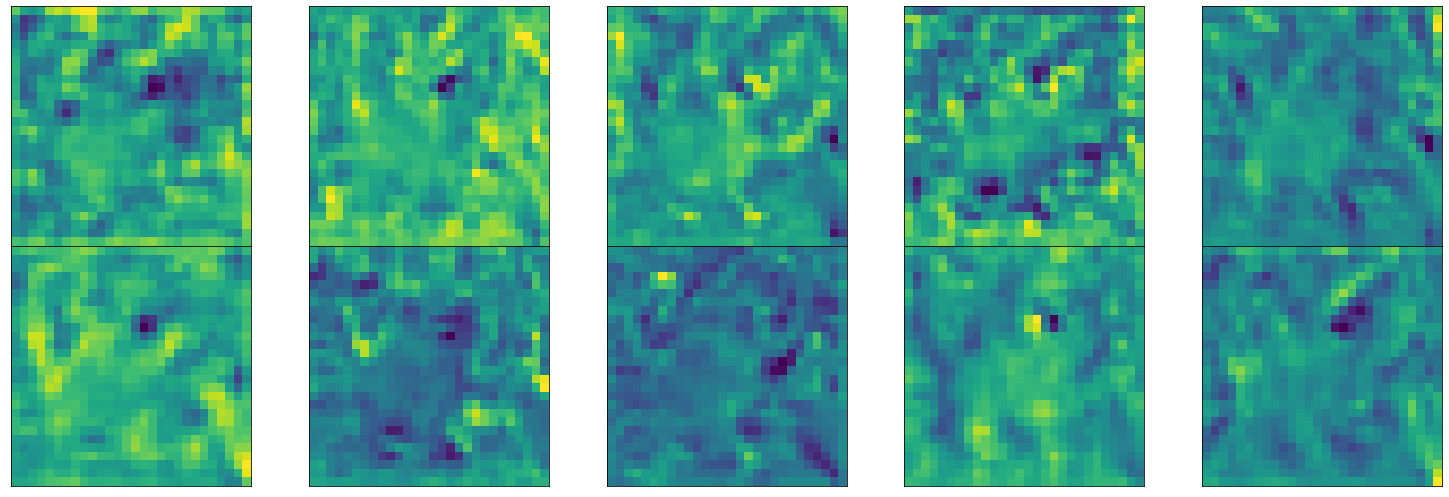

In [103]:
conv_out = LayerActivations(vgg.features,19)

o = vgg(Variable(img.cuda()))

conv_out.remove()

act = conv_out.features
print(act.shape)
fig = plt.figure(figsize=(20,50))
fig.subplots_adjust(left=0,right=1,bottom=0,top=0.8,hspace=0,wspace=0.2)
for i in range(10):
    ax = fig.add_subplot(12,5,i+1,xticks=[],yticks=[])
    ax.imshow(act[0][i])

# 重みの可視化

In [104]:
vgg.state_dict().keys()

odict_keys(['features.0.weight', 'features.0.bias', 'features.2.weight', 'features.2.bias', 'features.5.weight', 'features.5.bias', 'features.7.weight', 'features.7.bias', 'features.10.weight', 'features.10.bias', 'features.12.weight', 'features.12.bias', 'features.14.weight', 'features.14.bias', 'features.17.weight', 'features.17.bias', 'features.19.weight', 'features.19.bias', 'features.21.weight', 'features.21.bias', 'features.24.weight', 'features.24.bias', 'features.26.weight', 'features.26.bias', 'features.28.weight', 'features.28.bias', 'classifier.0.weight', 'classifier.0.bias', 'classifier.3.weight', 'classifier.3.bias', 'classifier.6.weight', 'classifier.6.bias'])

In [0]:
cnn_weights = vgg.state_dict()['features.0.weight'].cpu()

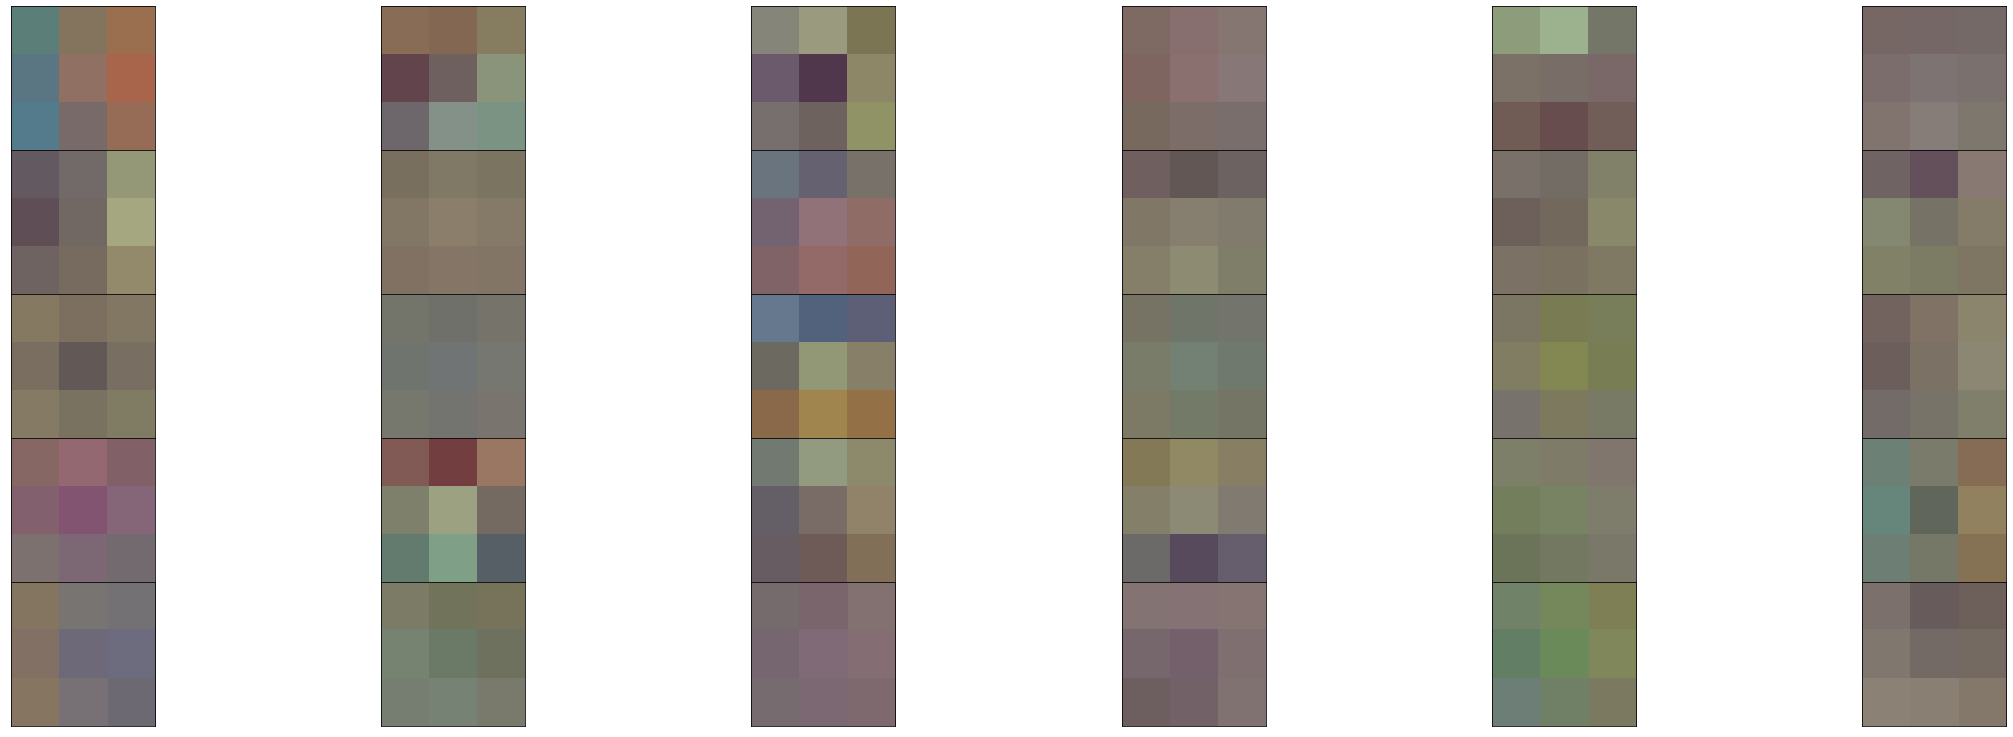

In [107]:
fig = plt.figure(figsize=(30,30))
fig.subplots_adjust(left=0,right=1,bottom=0,top=0.8,hspace=0,wspace=0.2)
for i in range(30):
    ax = fig.add_subplot(12,6,i+1,xticks=[],yticks=[])
    imshow(cnn_weights[i])